# Exploring Data With Pandas: Part 2

In [1]:
%matplotlib inline

In [1]:
# import libraries and read in the csv file
import re as re, pandas as pd, numpy as np
df = pd.read_csv('Data/items.csv')
df.head()

,neighborhood,title,price,bedrooms,pid,longitude,date,link,latitude,sqft,sourcepage
0,(SOMA / south beach),"1bed + Den, 1bath at Mission Bay",$2895,/ 1br - 950ft² -,4046628359,-122.399663,Sep 4 2013,/sfc/apa/4046628359.html,37.774623,/ 1br - 950ft² -,http://sfbay.craigslist.org/sfc/apa/
1,(SOMA / south beach),Love where you live!,$3354,/ 1br - 710ft² -,4046761563,NaN,Sep 4 2013,/sfc/apa/4046761563.html,NaN,/ 1br - 710ft² -,http://sfbay.craigslist.org/sfc/apa/
2,(inner sunset / UCSF),We Welcome Your Furry Friends! Call Today!,$2865,/ 1br - 644ft² -,4046661504,-122.470727,Sep 4 2013,/sfc/apa/4046661504.html,37.765739,/ 1br - 644ft² -,http://sfbay.craigslist.org/sfc/apa/
3,(financial district),Golden Gateway Commons | 2BR + office townhous...,$5500,/ 2br - 1450ft² -,4036170429,NaN,Sep 4 2013,/sfc/apa/4036170429.html,NaN,/ 2br - 1450ft² -,http://sfbay.craigslist.org/sfc/apa/
4,(lower nob hill),Experience Luxury Living in San Fransisco!,$3892,/ 2br -,4046732678,NaN,Sep 4 2013,/sfc/apa/4046732678.html,NaN,/ 2br -,http://sfbay.craigslist.org/sfc/apa/


## Clean the price and neighborhood strings

In [2]:
# remove the dollar sign
df.price = df.price.str.strip('$').astype('float64')
df.price.head()

0    2895
1    3354
2    2865
3    5500
4    3892
Name: price, dtype: float64

In [3]:
# remove padded whitespace and the open and close parentheses
df.neighborhood = df.neighborhood.str.strip().str.strip('(').str.strip(')')
df.neighborhood.head()

0     SOMA / south beach
1     SOMA / south beach
2    inner sunset / UCSF
3     financial district
4         lower nob hill
Name: neighborhood, dtype: object

## One solution to clean the # of bedrooms

In [4]:
df.bedrooms.head(7)

0        / 1br - 950ft² -    
1        / 1br - 710ft² -    
2        / 1br - 644ft² -    
3       / 2br - 1450ft² -    
4                 / 2br -    
5                 / 1br -    
6              / 549ft² -    
Name: bedrooms, dtype: object

In [5]:
for label in df.bedrooms.index:
    if isinstance(df.bedrooms[label], str) and not pd.isnull(df.bedrooms[label]):
        end = df.bedrooms[label].find('br')
        if end == -1:
            df.loc[label,'bedrooms'] = 'Missing'
        else:
            start = df.bedrooms[label].find('/ ') + 2
            df.loc[label,'bedrooms'] = int(df.bedrooms[label][start: end])
df.bedrooms.head(9)

0          1
1          1
2          1
3          2
4          2
5          1
6    Missing
7          1
8          2
Name: bedrooms, dtype: object

In [6]:
# reload the dataset to try another way of cleaning the bedroom string
df = pd.read_csv('Data/items.csv')
df.price = df.price.str.strip('$').astype('float64')
df.neighborhood = df.neighborhood.str.strip().str.strip('(').str.strip(')')

## Another way to clean the bedroom data: use a regular expression

In [7]:
for i in df.bedrooms.index:
    r = re.search('(?<=\/ )(.*)(?=br)', df.loc[i,'bedrooms'])
    df.loc[i,'bedrooms'] = r.group(0) if r else np.nan

In [8]:
df.bedrooms = df.bedrooms.astype('float64')
df.bedrooms.head(9)

0     1
1     1
2     1
3     2
4     2
5     1
6   NaN
7     1
8     2
Name: bedrooms, dtype: float64

## Now we clean up the sqft data...

In [9]:
df.sqft.head(9)

0        / 1br - 950ft² -    
1        / 1br - 710ft² -    
2        / 1br - 644ft² -    
3       / 2br - 1450ft² -    
4                 / 2br -    
5                 / 1br -    
6              / 549ft² -    
7        / 1br - 781ft² -    
8                 / 2br -    
Name: sqft, dtype: object

In [10]:
# for each item in sqft's index
for i in df.sqft.index:
    # if this element contains 'ft'
    if('ft' in df.sqft[i]):
        # this is the ending substring index
        end = df.sqft[i].find('ft')
        # this is the starting substring index
        begin = df.sqft[i].find('- ') + 2
        # the starting index will come AFTER the ending index IF there is sqft info but no bedroom info in the string
        if(begin > end):
            # we have to find the starting index this way if there is no bedroom info in the string
            begin = df.sqft[i].find('/ ') + 2
        # save the element as its substring from the starting to the ending index
        df.loc[i,'sqft'] = df.sqft[i][begin:end]
    else:
        # if this element doesn't contain 'ft' then save as NaN (not a number)
        df.loc[i,'sqft']  = np.nan
df.sqft = df.sqft.astype('float64')
df.sqft.head(9)

0     950
1     710
2     644
3    1450
4     NaN
5     NaN
6     549
7     781
8     NaN
Name: sqft, dtype: float64

## Let's break the date out into month, day, year fields

In [11]:
# you can use dot notation here
df.date.head()

0    Sep  4 2013
1    Sep  4 2013
2    Sep  4 2013
3    Sep  4 2013
4    Sep  4 2013
Name: date, dtype: object

In [12]:
# use df['ColumnName'] notation to create a new column
df['month'] = df['date'].str.split().str[0]
df['day'] = df['date'].str.split().str[1].astype('int32')
df['year'] = df['date'].str.split().str[2].astype('int32')

# we don't need that old date column anymore - delete it
del df['date']
df[['year', 'month', 'day']].head()

,year,month,day
0,2013,Sep,4
1,2013,Sep,4
2,2013,Sep,4
3,2013,Sep,4
4,2013,Sep,4


## Ok, how's our dataframe looking now?

In [13]:
df.head()

,neighborhood,title,price,bedrooms,pid,longitude,link,latitude,sqft,sourcepage,month,day,year
0,SOMA / south beach,"1bed + Den, 1bath at Mission Bay",2895,1,4046628359,-122.399663,/sfc/apa/4046628359.html,37.774623,950,http://sfbay.craigslist.org/sfc/apa/,Sep,4,2013
1,SOMA / south beach,Love where you live!,3354,1,4046761563,NaN,/sfc/apa/4046761563.html,NaN,710,http://sfbay.craigslist.org/sfc/apa/,Sep,4,2013
2,inner sunset / UCSF,We Welcome Your Furry Friends! Call Today!,2865,1,4046661504,-122.470727,/sfc/apa/4046661504.html,37.765739,644,http://sfbay.craigslist.org/sfc/apa/,Sep,4,2013
3,financial district,Golden Gateway Commons | 2BR + office townhous...,5500,2,4036170429,NaN,/sfc/apa/4036170429.html,NaN,1450,http://sfbay.craigslist.org/sfc/apa/,Sep,4,2013
4,lower nob hill,Experience Luxury Living in San Fransisco!,3892,2,4046732678,NaN,/sfc/apa/4046732678.html,NaN,NaN,http://sfbay.craigslist.org/sfc/apa/,Sep,4,2013


In [14]:
df['neighborhood'].unique()

array(['SOMA / south beach', 'inner sunset / UCSF', 'financial district',
       'lower nob hill', 'sunset / parkside', 'russian hill', nan,
       'pacific heights', 'marina / cow hollow',
       'downtown / civic / van ness', 'twin peaks / diamond hts',
       'castro / upper market', 'richmond / seacliff', 'glen park',
       'bayview', 'noe valley', 'tenderloin', 'inner richmond',
       'alamo square / nopa', 'visitacion valley', 'Russian Hill',
       'mission district', 'excelsior / outer mission', 'bernal heights',
       'nob hill', 'Alta Loma & Eastmoor Ave.', 'laurel hts / presidio',
       'USF / panhandle', 'cole valley / ashbury hts',
       'west portal / forest hill', 'lower haight',
       'ingleside / SFSU / CCSF', 'north beach / telegraph hill',
       'portola district', 'Sausalito', 'Mission District', 'hayes valley',
       'lower pac hts', 'Glen Park/West Portal', 'potrero hill',
       'Marina/Cow Hollow', 'haight ashbury',
       '512 Van Ness steps to Hayes Va

In [15]:
df['neighborhood'].value_counts()

SOMA / south beach                            174
pacific heights                                77
marina / cow hollow                            69
nob hill                                       49
russian hill                                   41
richmond / seacliff                            41
downtown / civic / van ness                    41
noe valley                                     35
sunset / parkside                              34
mission district                               33
ingleside / SFSU / CCSF                        33
lower pac hts                                  32
north beach / telegraph hill                   32
lower nob hill                                 31
inner sunset / UCSF                            30
financial district                             23
laurel hts / presidio                          21
alamo square / nopa                            17
castro / upper market                          17
inner richmond                                 17


## Let's do some descriptive stats...

In [16]:
# mean price
df['price'].mean()


4196.676028084253

In [17]:
# median price
df['price'].min()

195.0

In [18]:
df.describe()

,price,bedrooms,pid,longitude,latitude,sqft,day,year
count,997.000000,832.000000,1.000000e+03,779.000000,779.000000,417.000000,1000.000000,1000
mean,4196.676028,1.921875,4.035561e+09,-122.428012,37.773634,1162.647482,3.380000,2013
std,2830.259243,1.031351,1.592006e+07,0.032757,0.031936,717.494075,0.485629,0
min,195.000000,1.000000,3.980999e+09,-122.761230,37.500000,300.000000,3.000000,2013
25%,2600.000000,1.000000,4.031480e+09,-122.442967,37.762100,700.000000,3.000000,2013
50%,3375.000000,2.000000,4.044050e+09,-122.424687,37.781521,1000.000000,3.000000,2013
75%,4950.000000,2.000000,4.044962e+09,-122.410279,37.791436,1418.000000,4.000000,2013
max,45000.000000,7.000000,4.046762e+09,-122.250000,37.806444,6000.000000,4.000000,2013


In [19]:
# how many rental listings have 1 bedroom? 2? 3?
df['bedrooms'].value_counts()

1    345
2    303
3    115
4     49
5     15
6      3
7      2
dtype: int64

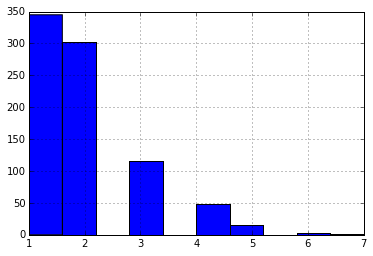

In [20]:
%matplotlib inline
df['bedrooms'].hist()

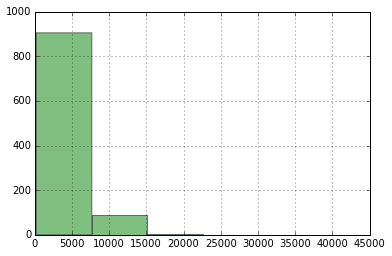

In [21]:
# prettier this time - define the color, opacity, and number of bins
df['price'].hist(color='g', alpha=0.5, bins=6)

In [22]:
# what is the median price per bedroom?
df.groupby(['bedrooms']).price.median()

bedrooms
1     2895.0
2     4300.0
3     6000.0
4     6875.0
5     7500.0
6    18500.0
7     8949.5
Name: price, dtype: float64

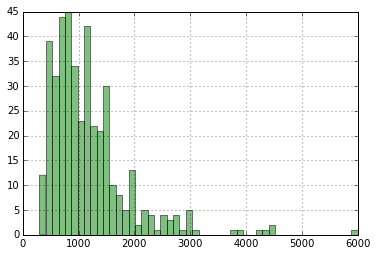

In [23]:
df['sqft'].hist(color='g', alpha=0.5, bins=50)

In [26]:
df.loc[df['price'] < 45000]

,neighborhood,title,price,bedrooms,pid,longitude,link,latitude,sqft,sourcepage,month,day,year
0,SOMA / south beach,"1bed + Den, 1bath at Mission Bay",2895,1,4046628359,-122.399663,/sfc/apa/4046628359.html,37.774623,950,http://sfbay.craigslist.org/sfc/apa/,Sep,4,2013
1,SOMA / south beach,Love where you live!,3354,1,4046761563,NaN,/sfc/apa/4046761563.html,NaN,710,http://sfbay.craigslist.org/sfc/apa/,Sep,4,2013
2,inner sunset / UCSF,We Welcome Your Furry Friends! Call Today!,2865,1,4046661504,-122.470727,/sfc/apa/4046661504.html,37.765739,644,http://sfbay.craigslist.org/sfc/apa/,Sep,4,2013
3,financial district,Golden Gateway Commons | 2BR + office townhous...,5500,2,4036170429,NaN,/sfc/apa/4036170429.html,NaN,1450,http://sfbay.craigslist.org/sfc/apa/,Sep,4,2013
4,lower nob hill,Experience Luxury Living in San Fransisco!,3892,2,4046732678,NaN,/sfc/apa/4046732678.html,NaN,NaN,http://sfbay.craigslist.org/sfc/apa/,Sep,4,2013
5,sunset / parkside,"$1250 - 1 bdrm, 1 bath",1250,1,4046731229,NaN,/sfc/apa/4046731229.html,NaN,NaN,http://sfbay.craigslist.org/sfc/apa/,Sep,4,2013
6,SOMA / south beach,Made For The Die-hard Giants Fan,3249,NaN,4046730047,-122.389798,/sfc/apa/4046730047.html,37.774192,549,http://sfbay.craigslist.org/sfc/apa/,Sep,4,2013
7,russian hill,Open Concept 1bed 1bath,2690,1,4046570245,-122.420787,/sfc/apa/4046570245.html,37.796034,781,http://sfbay.craigslist.org/sfc/apa/,Sep,4,2013
8,NaN,"Contemporary, charming 2bds/1ba with private d...",2850,2,4006732632,-122.457100,/sfc/apa/4006732632.html,37.735400,NaN,http://sfbay.craigslist.org/sfc/apa/,Sep,4,2013
9,pacific heights,"2bd/2.5ba, 2 car tandem parking @ 1998 Broadwa...",6500,2,4046018830,-122.429850,/sfc/apa/4046018830.html,37.794973,1400,http://sfbay.craigslist.org/sfc/apa/index200.html,Sep,4,2013
